## Exploratory Data Analysis for Airbnb New User Bookings datasets

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import miceforest as mf

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

### loading datasets

In [3]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
#sessions = pd.read_csv('sessions.csv')
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

## Data Wrangling

#### 1. Age-Gender Dataset

In [4]:
age_gender_df = age_gender_bkts.copy()
age_gender_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
age_gender_df['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

In [6]:
us_age_gender_df = age_gender_df[age_gender_df['country_destination'] == 'US']#.reset_index().drop('index', axis=1)
us_age_gender_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
378,90-94,US,female,1193.0,2015.0
379,75-79,US,male,3641.0,2015.0
380,70-74,US,male,5278.0,2015.0
381,65-69,US,male,7561.0,2015.0
382,60-64,US,male,9217.0,2015.0


#### 2. Countries Dataset

In [7]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.85,133.28,15297.74,7.74e+06,eng,0.00
1,CA,62.39,-96.82,2828.13,9.98e+06,eng,0.00
2,DE,51.17,10.45,7879.57,3.57e+05,deu,72.61
3,ES,39.90,-2.49,7730.72,5.05e+05,spa,92.25
4,FR,46.23,2.21,7682.94,6.44e+05,fra,92.06


#### 3. Sessions Dataset

In [8]:
#sessions.head()

#### 4. Train Users Dataset

In [9]:
train_users_df = train_users.copy()

In [10]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [11]:
train_users_df.shape

(213451, 16)

### Exploring the dataset

In [12]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [13]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### Check for duplicates

In [14]:
train_users_df.duplicated().sum()

0

dataset has no duplicates

### Exploring the descriptive statistics of the variables

In [15]:
train_users_df.describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.13e+05,88908,213451,125461.00,213451,213451.00,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,gxn3p5htnn,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.01e+13,NaN,NaN,49.67,NaN,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.25e+09,NaN,NaN,155.67,NaN,7.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.01e+13,NaN,NaN,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.01e+13,NaN,NaN,28.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.01e+13,NaN,NaN,34.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.01e+13,NaN,NaN,43.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

In [16]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Exploring variables

In [17]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

### 1. Numerical variables

In [18]:
train_users_df.select_dtypes(exclude='object').columns

Index(['timestamp_first_active', 'age', 'signup_flow'], dtype='object')

#### date_account_created, date_first_booking and timestamp_first_active

Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [19]:
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'], format='%Y-%m-%d')
train_users_df['date_first_booking'] = pd.to_datetime(train_users_df['date_first_booking'], format='%Y-%m-%d')
train_users_df['timestamp_first_active'] = pd.to_datetime(train_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [20]:
train_users_df.select_dtypes(exclude='object').columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'age', 'signup_flow'],
      dtype='object')

Extract `day`, `month` from `date_first_booking`

In [21]:
train_users_df['day_first_booking'] = train_users_df['date_first_booking'].dt.day_name()
train_users_df['day_first_booking'].unique()

array([nan, 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Friday', 'Sunday'], dtype=object)

<Axes: xlabel='day_first_booking', ylabel='count'>

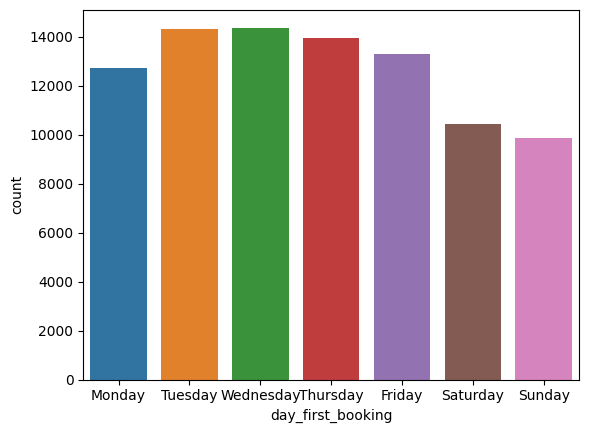

In [22]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = train_users_df['day_first_booking'], order = day_order)

In [23]:
train_users_df['month_first_booking'] = train_users_df['date_first_booking'].dt.month_name()
train_users_df['month_first_booking'].unique()

array([nan, 'August', 'September', 'February', 'January', 'July',
       'December', 'March', 'June', 'April', 'May', 'October', 'November'],
      dtype=object)

<Axes: xlabel='month_first_booking', ylabel='count'>

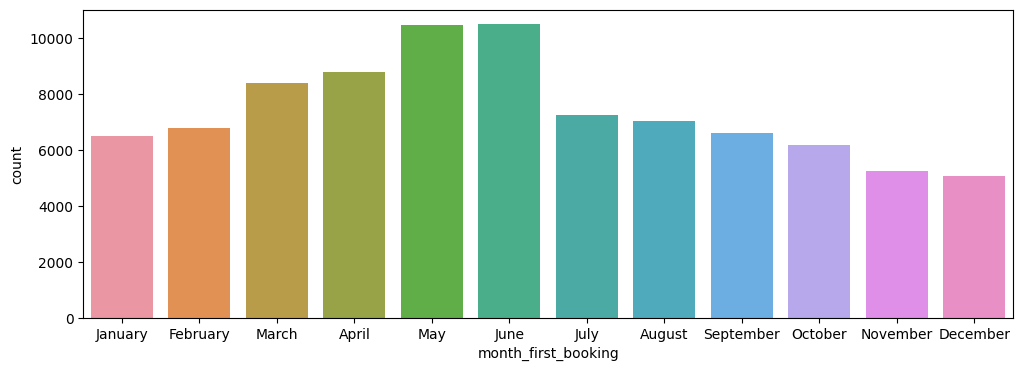

In [24]:
month_order = ['January', 'February',  'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,4))
sns.countplot(x = train_users_df['month_first_booking'], order = month_order)

Extract `hour` from `timestamp_first_active` to check when airbnb member are active around day time

In [25]:
train_users_df['hour_first_active'] = train_users_df['timestamp_first_active'].dt.hour
train_users_df['hour_first_active'].unique()

array([ 4, 17, 23,  6, 21,  1, 19,  0,  2,  5,  8, 20, 22, 15,  3, 13,  7,
       18,  9, 10, 16, 12, 11, 14])

<Axes: xlabel='hour_first_active', ylabel='count'>

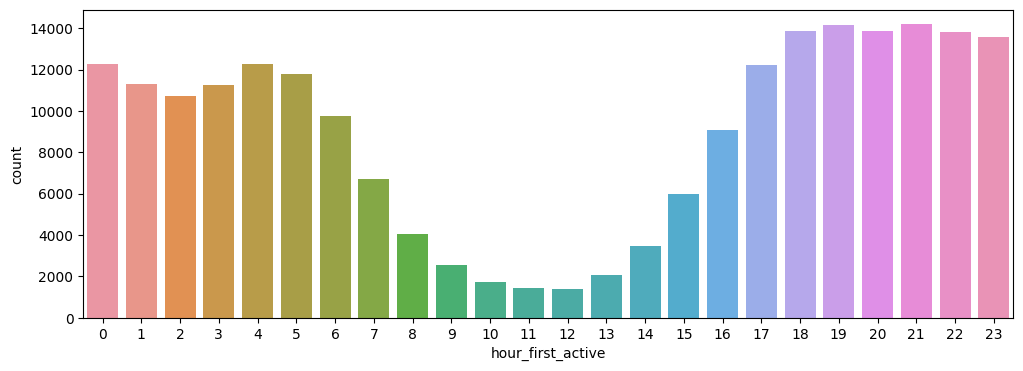

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x = train_users_df['hour_first_active'])

#### Age

In [27]:
train_users_df['age'].describe()

count    125461.00
mean         49.67
std         155.67
min           1.00
25%          28.00
50%          34.00
75%          43.00
max        2014.00
Name: age, dtype: float64

As we see from descriptive statistics of the **`age`**, the max value is **`2014`** which I think is wrong input (birth date instaed of age) so I will try to corret these values to avoid outliers.

In [28]:
for i in range(train_users_df.shape[0]):
    if train_users_df.loc[i, 'age'] > 150:
        train_users_df.loc[i, 'age'] = train_users_df.loc[i, 'date_account_created'].year - train_users_df.loc[i, 'age']

In [29]:
train_users_df['age'][train_users_df['age'] > 150].unique()

array([], dtype=float64)

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


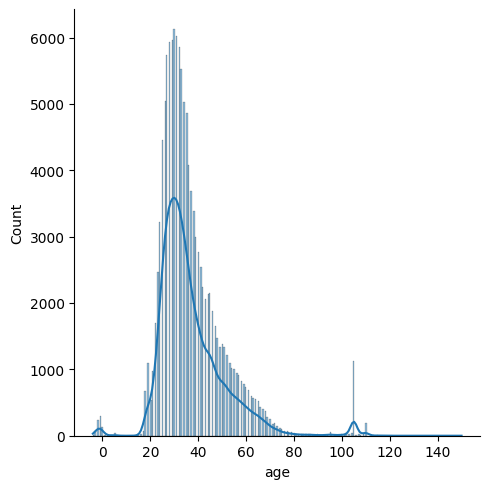

In [30]:
sns.displot(train_users_df['age'], kde=True)

In [31]:
train_users_df['age'].describe()

count    125461.00
mean         37.19
std          14.25
min          -4.00
25%          28.00
50%          34.00
75%          43.00
max         150.00
Name: age, dtype: float64

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


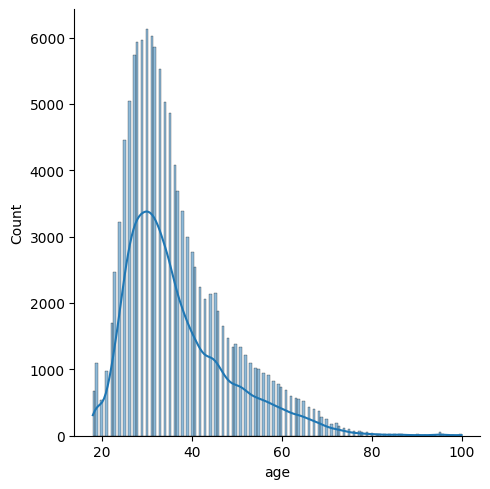

In [32]:
train_users_df.loc[train_users_df['age'] > 100, 'age'] = np.nan
train_users_df.loc[train_users_df['age'] < 18, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [33]:
train_users_df['age'].describe()

count    122987.00
mean         36.58
std          11.70
min          18.00
25%          28.00
50%          34.00
75%          42.00
max         100.00
Name: age, dtype: float64

In [34]:
train_users_df['age'].isnull().sum()

90464

As we see, **`age`** column has **90804** missing values, about **42.5%** of the dataset but **`age`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

#### signup_flow

In [35]:
train_users_df['signup_flow'].unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23],
      dtype=int64)

In [36]:
#train_users_df['signup_flow'] = train_users_df['signup_flow'].astype('str')

<Axes: xlabel='signup_flow', ylabel='count'>

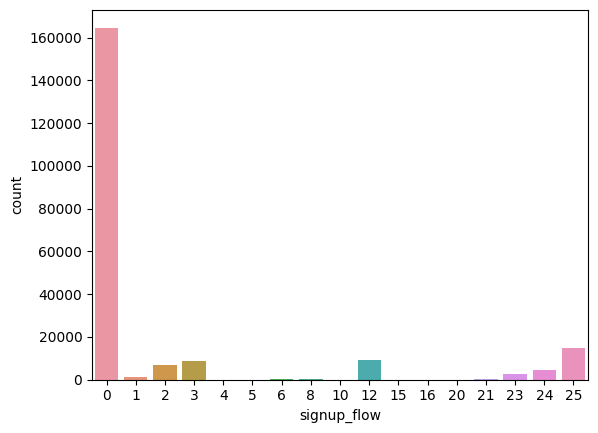

In [37]:
sns.countplot(x=train_users_df['signup_flow'])

### 3. Categorical variables

In [38]:
cat_variables = train_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'day_first_booking', 'month_first_booking'], dtype=object)

#### Gender

<Axes: xlabel='gender', ylabel='count'>

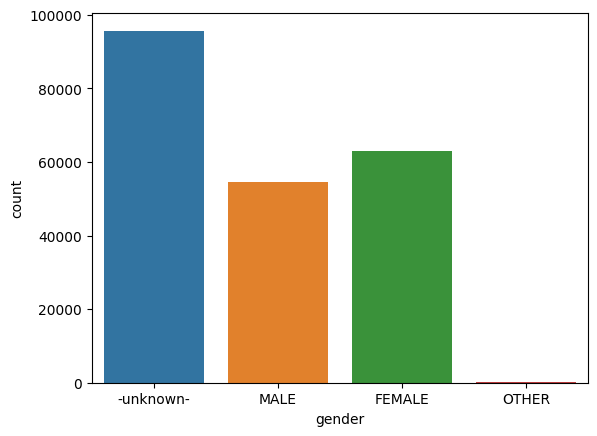

In [39]:
sns.countplot(x=train_users_df['gender'])

In [40]:
train_users_df['gender'].value_counts()

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: count, dtype: int64

In [41]:
train_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [42]:
train_users_df['gender'].isnull().sum()

95970

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

<Axes: xlabel='gender', ylabel='count'>

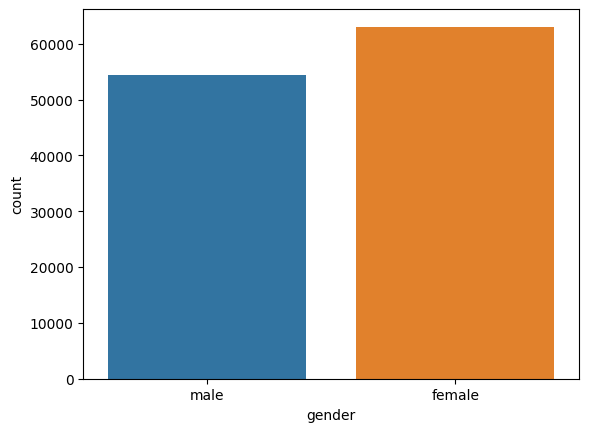

In [43]:
sns.countplot(x=train_users_df['gender'])

#### Signup method

<Axes: xlabel='signup_method', ylabel='count'>

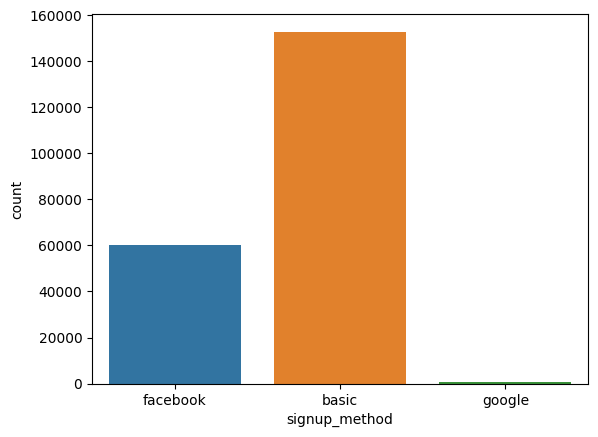

In [44]:
sns.countplot(x=train_users_df['signup_method'])

In [45]:
train_users_df['signup_method'].value_counts()

signup_method
basic       152897
facebook     60008
google         546
Name: count, dtype: int64

#### Language

<Axes: xlabel='language', ylabel='count'>

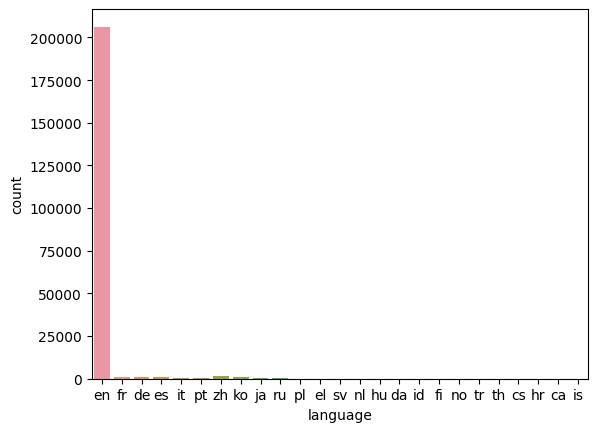

In [46]:
sns.countplot(x=train_users_df['language'])

In [47]:
train_users_df['language'].value_counts()[:5]

language
en    206314
zh      1632
fr      1172
es       915
ko       747
Name: count, dtype: int64

#### Affiliate channel

<Axes: xlabel='count', ylabel='affiliate_channel'>

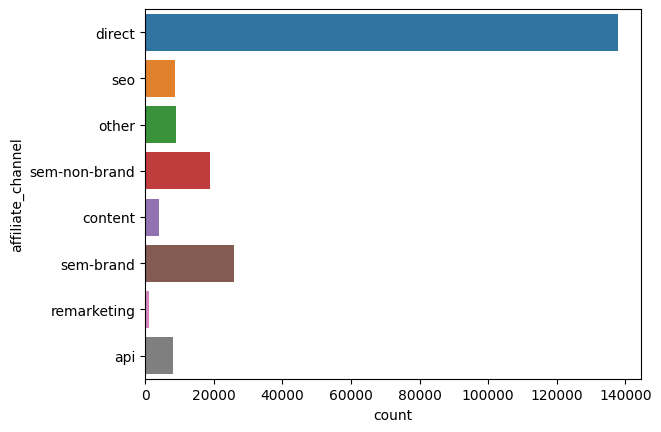

In [48]:
sns.countplot(y=train_users_df['affiliate_channel'])

In [49]:
train_users_df['affiliate_channel'].value_counts()

affiliate_channel
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: count, dtype: int64

#### Affiliate provider

<Axes: xlabel='count', ylabel='affiliate_provider'>

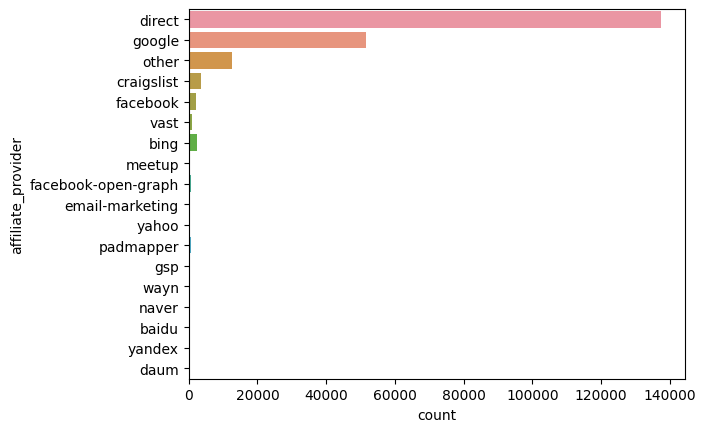

In [50]:
sns.countplot(y=train_users_df['affiliate_provider'])

In [51]:
train_users_df['affiliate_provider'].value_counts()[:5]

affiliate_provider
direct        137426
google         51693
other          12549
craigslist      3471
bing            2328
Name: count, dtype: int64

#### First affiliate tracked

<Axes: xlabel='count', ylabel='first_affiliate_tracked'>

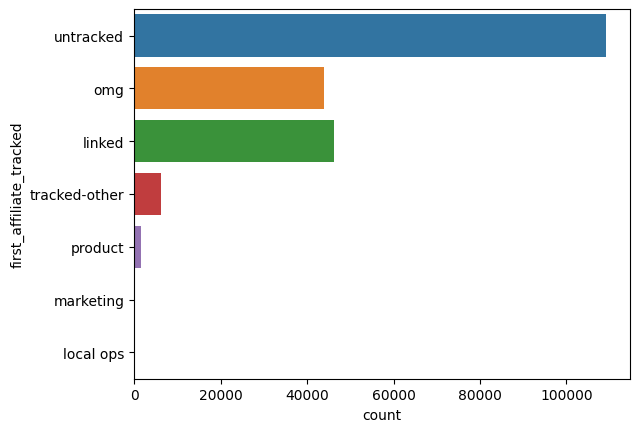

In [52]:
sns.countplot(y=train_users_df['first_affiliate_tracked'])

In [53]:
train_users_df['first_affiliate_tracked'].value_counts()

first_affiliate_tracked
untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: count, dtype: int64

#### Signup app

<Axes: xlabel='signup_app', ylabel='count'>

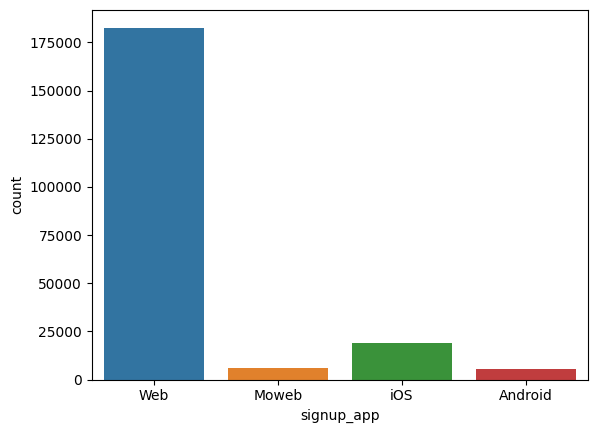

In [54]:
sns.countplot(x=train_users_df['signup_app'])

In [55]:
train_users_df['signup_app'].value_counts()

signup_app
Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: count, dtype: int64

#### First device type

<Axes: xlabel='count', ylabel='first_device_type'>

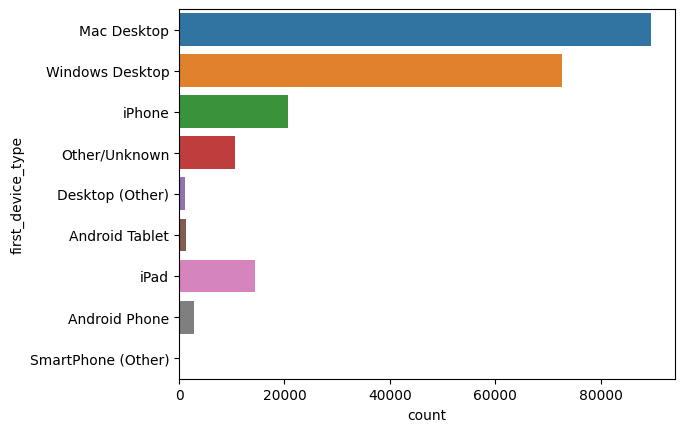

In [56]:
sns.countplot(y=train_users_df['first_device_type'])

In [57]:
train_users_df['first_device_type'].value_counts()

first_device_type
Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: count, dtype: int64

#### First browser

<Axes: xlabel='count', ylabel='first_browser'>

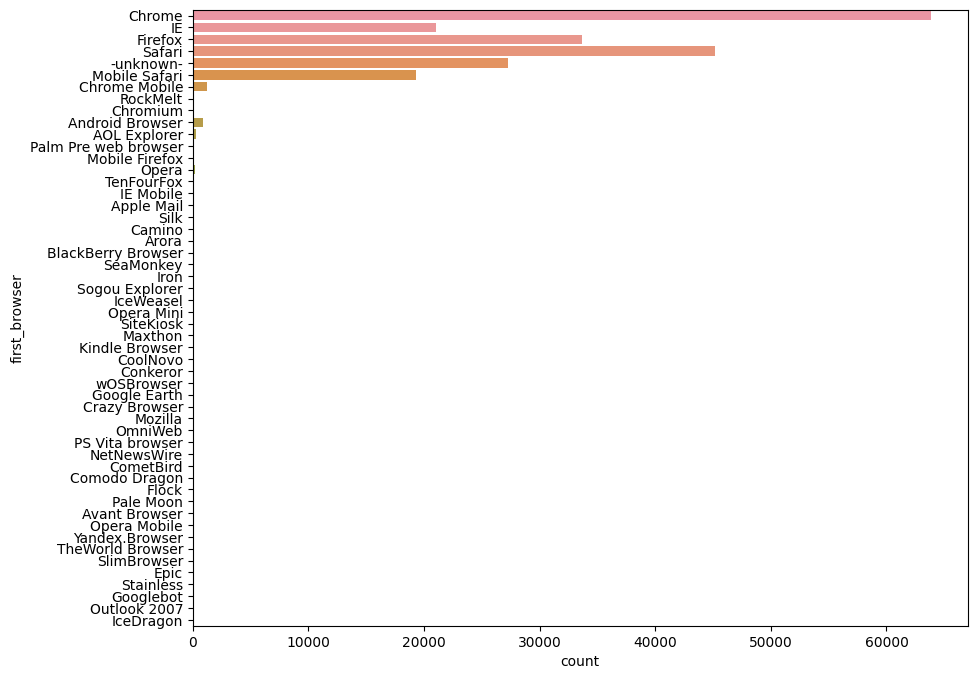

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(y=train_users_df['first_browser'])

In [59]:
train_users_df['first_browser'].value_counts()[:10]

first_browser
Chrome             63845
Safari             45169
Firefox            33655
-unknown-          27266
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
AOL Explorer         245
Opera                188
Name: count, dtype: int64

#### Country destination

<Axes: xlabel='country_destination', ylabel='count'>

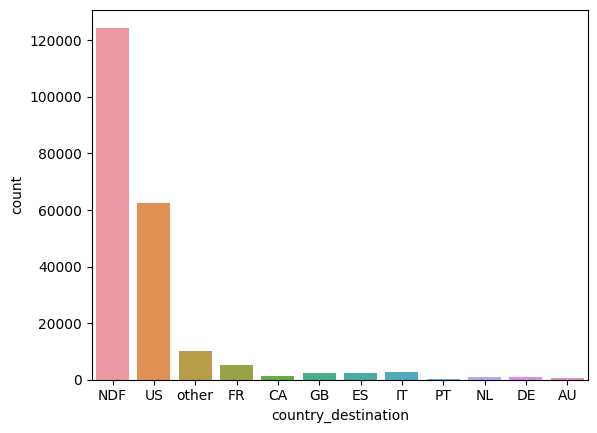

In [60]:
sns.countplot(x=train_users_df['country_destination'])

In [61]:
train_users_df['country_destination'].value_counts()

country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: count, dtype: int64

#### Data Imputation using `miceforest` algorithm

convert `object` columns to `category` type

In [62]:
train_users_df[train_users_df.select_dtypes(['object']).columns] = train_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [63]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active'],
      dtype='object')

In [64]:
target_col = ['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination']

remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [65]:
rare_cat = ['id' ,'signup_flow', 'language', 'affiliate_provider', 'first_affiliate_tracked', 'first_device_type', 'first_browser', 'country_destination']

In [66]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  category      
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   117481 non-null  category      
 5   age                      122987 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [67]:
data = train_users_df[target_col]

In [68]:
# Create kernel. 
kernel = mf.ImputationKernel(
  data,
  datasets=4,
  save_all_iterations=True,
  random_state=1
)

# Run mice with our newly tuned parameters.
kernel.mice(2)

# Printing the kernel will show you some high level information.
print(kernel)

# Create completed dataset
completed_dataset = kernel.complete_data(dataset=2)

# Add imputed data to the original datasets
train_users_df[target_col] = completed_dataset

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\miceforest\ImputationKernel.py:371: UserWarning: [id,language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,country_destination] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 4
         Iterations: 2
       Data Samples: 213451
       Data Columns: 13
  Imputed Variables: 3
save_all_iterations: True


In [69]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
day_first_booking          124543
month_first_booking        124543
hour_first_active               0
dtype: int64

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


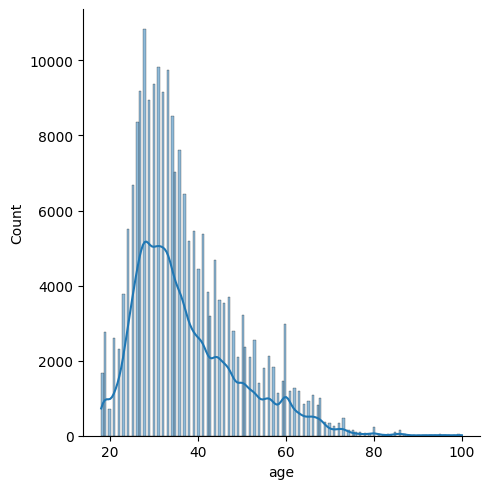

In [70]:
sns.displot(train_users_df['age'], kde=True)

I will use z-score method to nullify `age` outliers.

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


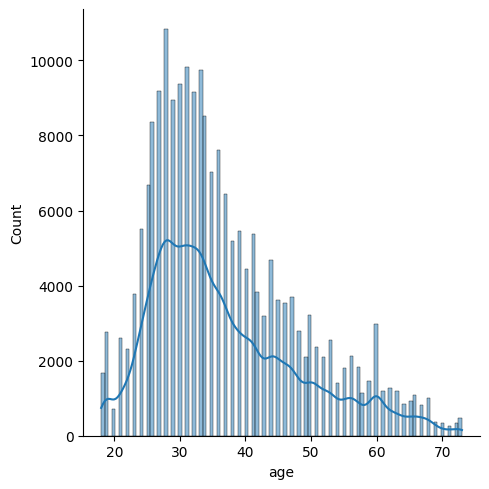

In [71]:
from scipy import stats
train_users_df['z_scores'] = stats.zscore(train_users_df['age'])
train_users_df['abs_z_scores'] = train_users_df['z_scores'].abs()
threshold = 3
train_users_df.loc[train_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [72]:
train_users_df.dropna(subset='age', axis=0, inplace=True)

In [73]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         123531
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
day_first_booking          123531
month_first_booking        123531
hour_first_active               0
z_scores                        0
abs_z_scores                    0
dtype: int64

In [74]:
train_users_df['age'].describe()

count    211905.00
mean         36.91
std          11.49
min          18.00
25%          28.00
50%          34.00
75%          44.00
max          73.00
Name: age, dtype: float64

### Create cleaned train_users dataframe

In [75]:
train_users_df[train_users_df.select_dtypes(['category']).columns] = train_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [76]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211905 entries, 0 to 213450
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       211905 non-null  object        
 1   date_account_created     211905 non-null  datetime64[ns]
 2   timestamp_first_active   211905 non-null  datetime64[ns]
 3   date_first_booking       88374 non-null   datetime64[ns]
 4   gender                   211905 non-null  object        
 5   age                      211905 non-null  float64       
 6   signup_method            211905 non-null  object        
 7   signup_flow              211905 non-null  int64         
 8   language                 211905 non-null  object        
 9   affiliate_channel        211905 non-null  object        
 10  affiliate_provider       211905 non-null  object        
 11  first_affiliate_tracked  211905 non-null  object        
 12  signup_app           

In [77]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [78]:
train_users_cleaned = train_users_df.drop(axis=1, 
                                          columns=['day_first_booking', 'month_first_booking', 'hour_first_active','z_scores', 'abs_z_scores']).copy()
train_users_cleaned.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,male,29.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,female,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,male,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [79]:
train_users_cleaned.shape

(211905, 16)

In [80]:
train_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211905 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       211905 non-null  object        
 1   date_account_created     211905 non-null  datetime64[ns]
 2   timestamp_first_active   211905 non-null  datetime64[ns]
 3   date_first_booking       88374 non-null   datetime64[ns]
 4   gender                   211905 non-null  object        
 5   age                      211905 non-null  float64       
 6   signup_method            211905 non-null  object        
 7   signup_flow              211905 non-null  int64         
 8   language                 211905 non-null  object        
 9   affiliate_channel        211905 non-null  object        
 10  affiliate_provider       211905 non-null  object        
 11  first_affiliate_tracked  211905 non-null  object        
 12  signup_app           

In [81]:
train_users_cleaned.to_csv('train_users_cleaned.csv')

#### 5. Test Users Dataset

In [82]:
test_users_df = test_users.copy()

In [83]:
test_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [84]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [85]:
test_users_df.shape

(62096, 15)

### Check for duplicates

In [86]:
test_users_df.duplicated().sum()

0

### Exploring the descriptive statistics of the variables

In [87]:
test_users_df.describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
count,62096,62096,6.21e+04,0.0,62096,33220.00,62096,62096.00,62096,62096,62096,62076,62096,62096,62096
unique,62096,92,NaN,NaN,4,NaN,4,NaN,24,7,17,7,4,9,31
top,5uwns89zht,2014-07-23,NaN,NaN,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,iPhone,-unknown-
freq,1,1105,NaN,NaN,33792,NaN,45325,NaN,59224,43844,43844,33949,37201,19055,17128
mean,NaN,NaN,2.01e+13,NaN,NaN,37.62,NaN,7.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.02e+07,NaN,NaN,74.44,NaN,11.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.01e+13,NaN,NaN,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.01e+13,NaN,NaN,26.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.01e+13,NaN,NaN,31.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.01e+13,NaN,NaN,40.00,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

In [88]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

## Exploring variables

In [89]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

### 1. Numerical variables

In [90]:
test_users_df.select_dtypes(exclude='object').columns

Index(['timestamp_first_active', 'date_first_booking', 'age', 'signup_flow'], dtype='object')

#### date_account_created, date_first_booking and timestamp_first_active
Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [91]:
test_users_df['date_account_created'] = pd.to_datetime(test_users_df['date_account_created'], format='%Y-%m-%d')
test_users_df['date_first_booking'] = pd.to_datetime(test_users_df['date_first_booking'], format='%Y-%m-%d')
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [92]:
test_users_df.select_dtypes(exclude='object').columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'age', 'signup_flow'],
      dtype='object')

#### Age

In [93]:
test_users_df['age'].describe()

count    33220.00
mean        37.62
std         74.44
min          1.00
25%         26.00
50%         31.00
75%         40.00
max       2002.00
Name: age, dtype: float64

In [94]:
for i in range(test_users_df.shape[0]):
    if test_users_df.loc[i, 'age'] > 150:
        test_users_df.loc[i, 'age'] = test_users_df.loc[i, 'date_account_created'].year - test_users_df.loc[i, 'age']

In [95]:
test_users_df['age'][test_users_df['age'] > 150].unique()

array([], dtype=float64)

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


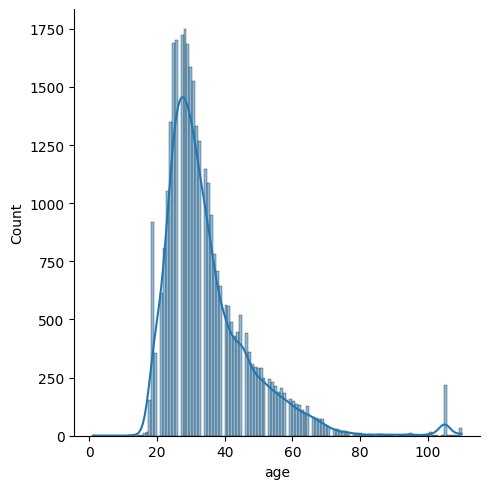

In [96]:
sns.displot(test_users_df['age'], kde=True)

In [97]:
test_users_df['age'].describe()

count    33220.00
mean        34.85
std         13.25
min          1.00
25%         26.00
50%         31.00
75%         40.00
max        110.00
Name: age, dtype: float64

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Yasser-Sakr\AppData\Local\Temp\ipykernel_11308\4074826335.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


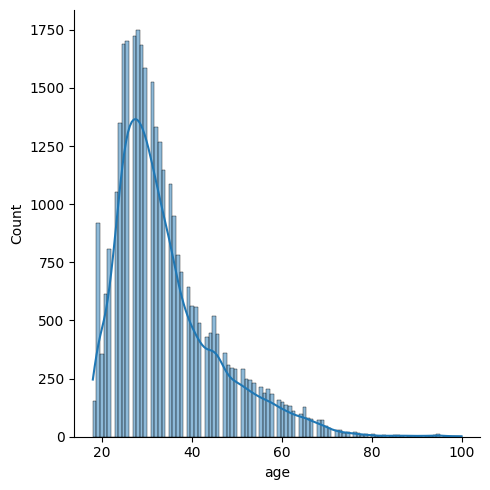

In [98]:
test_users_df.loc[test_users_df['age'] > 100, 'age'] = np.nan
test_users_df.loc[test_users_df['age'] < 18, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)
plt.tight_layout()

In [99]:
test_users_df['age'].describe()

count    32887.00
mean        34.24
std         11.47
min         18.00
25%         26.00
50%         31.00
75%         39.00
max        100.00
Name: age, dtype: float64

In [100]:
test_users_df['age'].isnull().sum()

29209

As we see, **`age`** column has missing values, so i will use **`miceforest`** to fill age column later.

### 3. Categorical variables

In [101]:
cat_variables = test_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'], dtype=object)

#### Gender

<Axes: xlabel='gender', ylabel='count'>

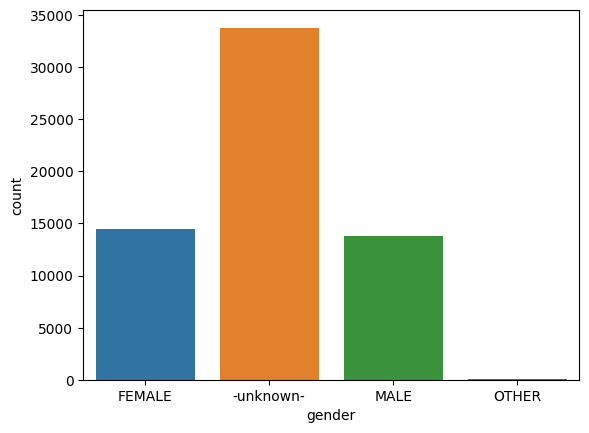

In [102]:
sns.countplot(x=test_users_df['gender'])

In [103]:
test_users_df['gender'].value_counts()

gender
-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: count, dtype: int64

In [104]:
test_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [105]:
test_users_df['gender'].isnull().sum()

33844

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

### Data Imputation using `miceforest` algorithm
#### convert `object` columns to `category` type

In [106]:
test_users_df[test_users_df.select_dtypes(['object']).columns] = test_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [107]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [108]:
test_target_col = ['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser']

test_remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [109]:
test_rare_cat = ['id' ,'signup_flow', 'language', 'affiliate_provider', 'first_affiliate_tracked', 
            'first_device_type', 'first_browser', 'country_destination']

In [110]:
test_data = test_users_df[test_target_col]

In [111]:
# Create kernel. 
test_kernel = mf.ImputationKernel(
  test_data,
  datasets=4,
  save_all_iterations=True,
  random_state=1
)

# Run mice with our newly tuned parameters.
test_kernel.mice(2)

# Printing the kernel will show you some high level information.
print(test_kernel)

# Create completed dataset
completed_dataset = test_kernel.complete_data(dataset=2)

# Add imputed data to the original datasets
test_users_df[test_target_col] = completed_dataset

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\miceforest\ImputationKernel.py:371: UserWarning: [id,signup_method,language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 4
         Iterations: 2
       Data Samples: 62096
       Data Columns: 12
  Imputed Variables: 3
save_all_iterations: True


In [112]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


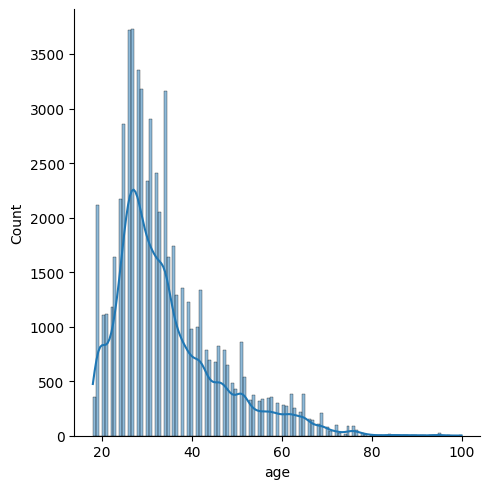

In [113]:
sns.displot(test_users_df['age'], kde=True)

C:\Users\Yasser-Sakr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


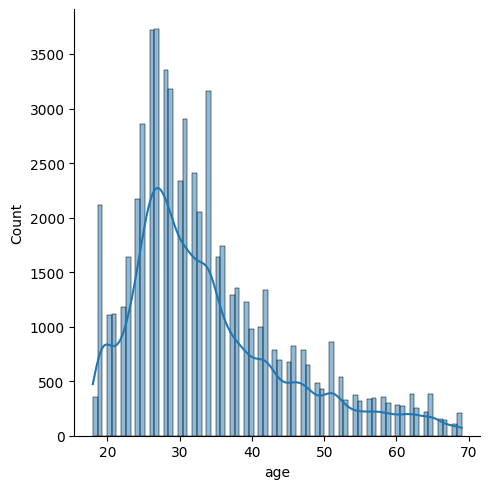

In [114]:
from scipy import stats
test_users_df['z_scores'] = stats.zscore(test_users_df['age'])
test_users_df['abs_z_scores'] = test_users_df['z_scores'].abs()
threshold = 3
test_users_df.loc[test_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)

In [115]:
test_users_df.dropna(subset='age', axis=0, inplace=True)

In [116]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         61426
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
z_scores                       0
abs_z_scores                   0
dtype: int64

In [117]:
test_users_df['age'].describe()

count    61426.00
mean        33.88
std         10.87
min         18.00
25%         26.00
50%         31.00
75%         39.00
max         69.00
Name: age, dtype: float64

### Create cleaned train_users dataframe

In [118]:
test_users_df[test_users_df.select_dtypes(['category']).columns] = test_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [119]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61426 entries, 0 to 62095
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       61426 non-null  object        
 1   date_account_created     61426 non-null  datetime64[ns]
 2   timestamp_first_active   61426 non-null  datetime64[ns]
 3   date_first_booking       0 non-null      datetime64[ns]
 4   gender                   61426 non-null  object        
 5   age                      61426 non-null  float64       
 6   signup_method            61426 non-null  object        
 7   signup_flow              61426 non-null  int64         
 8   language                 61426 non-null  object        
 9   affiliate_channel        61426 non-null  object        
 10  affiliate_provider       61426 non-null  object        
 11  first_affiliate_tracked  61426 non-null  object        
 12  signup_app               61426 non-nu

In [120]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [121]:
test_users_cleaned = test_users_df.drop(axis=1, columns=['z_scores', 'abs_z_scores']).copy()
test_users_cleaned.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,female,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,female,37.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,male,32.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,male,26.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,male,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [122]:
test_users_cleaned.shape

(61426, 15)

In [123]:
test_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61426 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       61426 non-null  object        
 1   date_account_created     61426 non-null  datetime64[ns]
 2   timestamp_first_active   61426 non-null  datetime64[ns]
 3   date_first_booking       0 non-null      datetime64[ns]
 4   gender                   61426 non-null  object        
 5   age                      61426 non-null  float64       
 6   signup_method            61426 non-null  object        
 7   signup_flow              61426 non-null  int64         
 8   language                 61426 non-null  object        
 9   affiliate_channel        61426 non-null  object        
 10  affiliate_provider       61426 non-null  object        
 11  first_affiliate_tracked  61426 non-null  object        
 12  signup_app               61426 non-nu

In [124]:
test_users_cleaned.to_csv('test_users_cleaned.csv')

##############################################################################################################################

### ML modelling

In [220]:
RANDOM_STATE = 1 ## We will pass it to every sklearn call so we ensure reproducibility

In [221]:
train_users_cleaned.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,male,29.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,female,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,male,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [222]:
X_train = train_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1).iloc[:, :-1]
y_train = train_users_cleaned.iloc[:, -1]

In [223]:
X_train.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,male,29.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,female,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,male,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [224]:
y_train.head()

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [225]:
test_users_cleaned.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,female,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,female,37.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,male,32.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,male,26.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,male,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [226]:
X_test = test_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1)

In [227]:
X_test.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,female,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,female,37.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,male,32.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,male,26.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,male,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


### One Hot Encoding

In [228]:
cat_cols = X_train.select_dtypes('object').columns
cat_cols

Index(['gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')

In [229]:
X_train.shape

(211905, 11)

In [230]:
X_test.shape

(61426, 11)

In [231]:
X = pd.concat([X_train, X_test], ignore_index=True)

In [232]:
X.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,male,29.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,female,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,male,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_cols)], remainder='passthrough')

In [234]:
X = ct.fit_transform(X)

### Label Encoding

In [235]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([ 7,  7, 10, ...,  7,  7,  7])

### Feature Scaling

In [236]:
X_train = X[:X_train.shape[0], :]
X_test = X[X_train.shape[0]:, :]

In [237]:
X_train

<211905x134 sparse matrix of type '<class 'numpy.float64'>'
	with 2167492 stored elements in Compressed Sparse Row format>

In [238]:
X_test

<61426x134 sparse matrix of type '<class 'numpy.float64'>'
	with 634904 stored elements in Compressed Sparse Row format>

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train[:, [1, 3]] = sc.fit_transform(X_train[:, [1, 3]])
X_test[:, [1, 3]] = sc.transform(X_test[:, [1, 3]])

#### Linear Regression

In [241]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [248]:
y_pred = regressor.predict(X_test).astype('int')

In [249]:
y_pred

array([7, 7, 8, ..., 7, 7, 8])

In [252]:
yhat = le.inverse_transform(y_pred)

In [263]:
yhat.shape

(61426,)

In [264]:
test_users_cleaned['id'].shape

(61426,)

In [271]:
submission = pd.concat([test_users_cleaned['id'].reset_index(drop=True), pd.Series(yhat)], axis=1)

In [274]:
submission.head()

,id,0
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NL
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [273]:
submission.shape

(61426, 2)

In [275]:
submission.to_csv('submission.csv')